### Conversion of Images/Picture to array

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from skimage.io import imread
from skimage.transform import resize
import math
import pandas as pd
from skimage import img_as_ubyte
from collections import Counter
import datetime

In [2]:
def resize_images(src, pklname, include, width=64, height=None):
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1}) images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height))
                    data['label'].append(subdir[:])
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [4]:
###### PUT YOUR PATH HERE FOR THE IMAGE ##########
file_path = ''
data_path ='Images'
os.listdir(data_path)

['Ball',
 'Bear',
 'Cat',
 'Chicken',
 'Deer',
 'Duck',
 'Eagle',
 'Elephant',
 'Human',
 'Monkey',
 'Mug',
 'Panda',
 'Pizza',
 'Sunflower']

In [5]:
data_path

'Images'

In [6]:
base_name = 'images'
width = 64
include = os.listdir(data_path)
resize_images(src=data_path, pklname=base_name, width=width, include=include)

Ball
Bear
Cat
Chicken
Deer
Duck
Eagle
Elephant
Human
Monkey
Mug
Panda
Pizza
Sunflower


In [7]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')

print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  1339
keys:  ['description', 'label', 'data']
description:  resized (64x64) images in rgb
image shape:  (64, 64, 3)
labels: ['Ball' 'Bear' 'Cat' 'Chicken' 'Deer' 'Duck' 'Eagle' 'Elephant' 'Human'
 'Monkey' 'Mug' 'Panda' 'Pizza' 'Sunflower']


Counter({'Ball': 54,
         'Bear': 101,
         'Cat': 159,
         'Chicken': 100,
         'Deer': 101,
         'Duck': 102,
         'Eagle': 97,
         'Elephant': 100,
         'Human': 100,
         'Monkey': 100,
         'Mug': 71,
         'Panda': 117,
         'Pizza': 52,
         'Sunflower': 85})

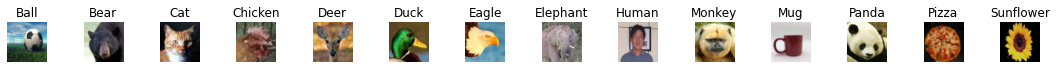

In [8]:
labels = np.unique(data['label'])
 
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

for ax, label in zip(axes, labels):
    idx = data['label'].index(label)

    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [9]:
##### Separate the Feature and Target Variables ##############

X = np.array(data['data'])
y = np.array(data['label'])

In [10]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [11]:
####### RUN THIS PART TO FLATTEN THE IMAGE TO 2D ############

# flatten the images
n_samples = len(X)
X = X.reshape((n_samples, -1))

In [12]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 40)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predicted = model.predict(X_test)

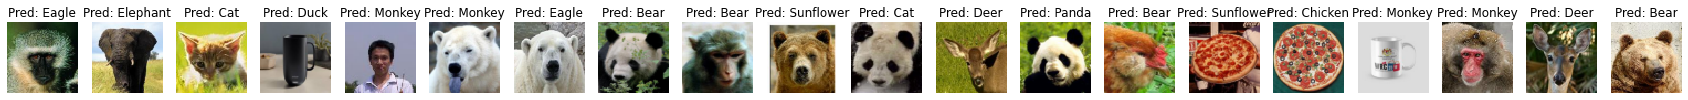

In [13]:
###### USE THIS CODE TO SEE YOUR PREDICTIONS USING THE DATASET ########

_, axes = plt.subplots(nrows=1, ncols=20, figsize=(30, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(64, 64 ,3) #use the width defined here
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}')


In [14]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

        Ball       0.15      0.20      0.17        10
        Bear       0.26      0.27      0.27        22
         Cat       0.29      0.38      0.33        29
     Chicken       0.35      0.47      0.40        15
        Deer       0.47      0.38      0.42        21
        Duck       0.29      0.43      0.34        14
       Eagle       0.21      0.21      0.21        19
    Elephant       0.39      0.26      0.31        27
       Human       0.59      0.33      0.43        30
      Monkey       0.15      0.15      0.15        26
         Mug       0.50      0.45      0.48        11
       Panda       0.73      0.50      0.59        22
       Pizza       0.11      0.10      0.11        10
   Sunflower       0.27      0.50      0.35        12

    accuracy                           0.33       268
   macro avg       0.34      0.33      0.33       268
weighted avg       0.36      0.33      0.33       268



## Colour Patterning: Reduce colour palette to 64-colour model

In [15]:
def four_bit(image):
    out = image.copy()
    out = img_as_ubyte(out)
    row_colours = [] #an array containing the by-pixel values for each row, equivalent to an image
    for row in out:
        pixel_colours = [] #an array containing [r,g,b] values for each pixel in a row
        for pixel in row:
            bit_colours = []
            for rgb in pixel:
                col_4b = (math.floor(rgb/64)*64)+32
                bit_colours.append(col_4b)
            pixel_colours.append(bit_colours)
        row_colours.append(pixel_colours)
    out = np.array(row_colours)
    return out

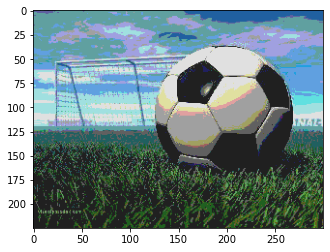

In [16]:
plt.imshow(four_bit(plt.imread('image_0001.jpg')))

# Configure all of the possible RGB configurations within this 4-bit scheme

In [17]:
colours = np.array([[0,0,0]])
c = colours
colours = np.concatenate((colours,c+[0,0,64]))
colours = np.concatenate((colours,c+[0,0,128]))
colours = np.concatenate((colours,c+[0,0,192]))
c = colours
colours = np.concatenate((colours,c+[0,64,0]))
colours = np.concatenate((colours,c+[0,128,0]))
colours = np.concatenate((colours,c+[0,192,0]))
c = colours
colours = np.concatenate((colours,c+[64,0,0]))
colours = np.concatenate((colours,c+[128,0,0]))
colours = np.concatenate((colours,c+[192,0,0]))

colours = colours+32

colours = [np.array(x) for x in colours]

In [87]:
colours

[array([32, 32, 32]),
 array([32, 32, 96]),
 array([ 32,  32, 160]),
 array([ 32,  32, 224]),
 array([32, 96, 32]),
 array([32, 96, 96]),
 array([ 32,  96, 160]),
 array([ 32,  96, 224]),
 array([ 32, 160,  32]),
 array([ 32, 160,  96]),
 array([ 32, 160, 160]),
 array([ 32, 160, 224]),
 array([ 32, 224,  32]),
 array([ 32, 224,  96]),
 array([ 32, 224, 160]),
 array([ 32, 224, 224]),
 array([96, 32, 32]),
 array([96, 32, 96]),
 array([ 96,  32, 160]),
 array([ 96,  32, 224]),
 array([96, 96, 32]),
 array([96, 96, 96]),
 array([ 96,  96, 160]),
 array([ 96,  96, 224]),
 array([ 96, 160,  32]),
 array([ 96, 160,  96]),
 array([ 96, 160, 160]),
 array([ 96, 160, 224]),
 array([ 96, 224,  32]),
 array([ 96, 224,  96]),
 array([ 96, 224, 160]),
 array([ 96, 224, 224]),
 array([160,  32,  32]),
 array([160,  32,  96]),
 array([160,  32, 160]),
 array([160,  32, 224]),
 array([160,  96,  32]),
 array([160,  96,  96]),
 array([160,  96, 160]),
 array([160,  96, 224]),
 array([160, 160,  32]),

In [18]:
from skimage import transform as tf

## Data Augment by Translation and Flip 

In [19]:
def extend_data(im_data):
    #extends a dataset by adding its flips, translations, and colour compositions
    #logging code included, due to long runtimes
    start = datetime.datetime.now()
    #TL extension
    ul = tf.AffineTransform(translation = (5,5))
    ur = tf.AffineTransform(translation = (-5,5))
    dl = tf.AffineTransform(translation = (5,-5))
    dr = tf.AffineTransform(translation = (-5,-5))
    tl_images =np.zeros((1,64,64,3))
    for image in im_data:
        tl_images = np.concatenate((tl_images,(tf.warp(image,ul).reshape(1,64,64,3))))
    print(f"First TLs finished by {datetime.datetime.now()-start} mark")
    for image in im_data:
        tl_images = np.concatenate((tl_images,(tf.warp(image,ur).reshape(1,64,64,3))))
    print(f"Second TLs finished by {datetime.datetime.now()-start} mark")
    for image in im_data:
        tl_images = np.concatenate((tl_images,(tf.warp(image,dl).reshape(1,64,64,3))))
    print(f"Third TLs finished by {datetime.datetime.now()-start} mark")
    for image in im_data:
        tl_images = np.concatenate((tl_images,(tf.warp(image,dr).reshape(1,64,64,3))))
    print(f"Last TLs finished by {datetime.datetime.now()-start} mark")
    tl_images = tl_images[1:,:,:,:]
    im_data2 = np.concatenate((im_data,tl_images))
    
    print("Done Translating, proceeding to flips...")
    #flip extension, including the TLs
    flip_img = []
    for image in im_data2:
        flip_img.append(image[::-1])
    print(f"First flips finished by {datetime.datetime.now()-start} mark")
    for image in im_data2:
        flip_img.append(np.fliplr(image))
    print(f"Second flips finished by {datetime.datetime.now()-start} mark")
    for image in im_data2:
        flip_img.append(np.fliplr(image[::-1]))
    print(f"Last flips finished by {datetime.datetime.now()-start} mark")
    
    im_data3 = np.concatenate((im_data2,np.array(flip_img)))
    return im_data3

In [20]:
data['data2'] = extend_data(data['data'])

First TLs finished by 0:00:36.283652 mark
Second TLs finished by 0:02:28.375914 mark
Third TLs finished by 0:05:32.328024 mark
Last TLs finished by 0:09:38.594908 mark
Done Translating, proceeding to flips...
First flips finished by 0:09:38.817941 mark
Second flips finished by 0:09:38.828904 mark
Last flips finished by 0:09:38.841902 mark


In [22]:
data['data2'].shape

(26780, 64, 64, 3)

# Preprocess the data
The colour patterning function defined above is used to segment the pictures into 64 bins of colours. The resulting dataframe will include the number of pixels of each colour.

The DecisionTree model we will be using most conveniently accepts dataframes, so this is used to output X and y into the appropriate forms

Warning: Long runtime for large datasets (10000+)

In [163]:
def pre_ML(X,colours = colours):
    #turns the array of images X into a dataframe
    begin_time = datetime.datetime.now()
    y = np.resize(data['label'],len(X))
    colours = pd.Series([tuple(x) for x in colours])
    base_df = pd.DataFrame(colours)
    base_df["Pixels"]= pd.Series(np.zeros(64))
    base_df = base_df.rename(columns={0:"Colour"})
    tracker = 0
    for img in X:
        f_bit = four_bit(img)
        tup = [tuple(x) for x in list(f_bit.reshape(4096,3))]
        c_tup = Counter(tup)
        df = pd.DataFrame.from_dict(c_tup, orient='index').reset_index()
        df = df.rename(columns={'index':'Colour', 0:'Pixels'})
        df.head()
        base_df = base_df.merge(df,how = 'left', on = "Colour")
        if tracker%1000 ==0:
            print(f"Tracker update at {tracker} frames, time elapsed {datetime.datetime.now()-begin_time}")
        tracker+=1

    prepped = base_df.set_index("Colour").transpose().fillna(0).iloc[1:,:]
    prepped['label'] = y
    prepped = prepped.set_index('label')
    nsamples = len(X)
    X = X.reshape((nsamples,-1))
    dataset = pd.DataFrame({'label': list(y), 'images': list(X)}, columns=['label', 'images'])
    X2 = dataset.copy()
    ima_df = pd.DataFrame(X)/255
    X2 = pd.concat((X2,ima_df),axis = 1).drop('images', axis = 1)
    X2 = X2.set_index('label')
    final = pd.concat((X2,prepped), axis = 1)
    X = final
    print(datetime.datetime.now()-begin_time)
    return X,y

In [32]:
def run_ML(X,y):
    begin_time = datetime.datetime.now()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state = 42)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    print(datetime.datetime.now()-begin_time)

In [33]:
X, y = pre_ML(data['data2'],colours)

Tracker update at 0 frames, time elapsed 0:00:00.059839
Tracker update at 1000 frames, time elapsed 0:00:46.653419
Tracker update at 2000 frames, time elapsed 0:01:34.064961
Tracker update at 3000 frames, time elapsed 0:02:22.488977
Tracker update at 4000 frames, time elapsed 0:03:21.358593
Tracker update at 5000 frames, time elapsed 0:04:37.123085
Tracker update at 6000 frames, time elapsed 0:05:55.571837
Tracker update at 7000 frames, time elapsed 0:06:51.032063
Tracker update at 8000 frames, time elapsed 0:07:44.586269
Tracker update at 9000 frames, time elapsed 0:08:38.871943
Tracker update at 10000 frames, time elapsed 0:09:34.541148
Tracker update at 11000 frames, time elapsed 0:10:32.890690
Tracker update at 12000 frames, time elapsed 0:11:31.772774
Tracker update at 13000 frames, time elapsed 0:12:29.952483
Tracker update at 14000 frames, time elapsed 0:13:29.199755
Tracker update at 15000 frames, time elapsed 0:14:29.590599
Tracker update at 16000 frames, time elapsed 0:15:30.

In [37]:
begin_time = datetime.datetime.now()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print(datetime.datetime.now()-begin_time)

0:04:54.165750


# Data Evaluation using Classification Report and Confusion Matrix

In [38]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

        Ball       0.82      0.79      0.81       329
        Bear       0.82      0.82      0.82       597
         Cat       0.85      0.87      0.86       963
     Chicken       0.96      0.97      0.97       585
        Deer       0.89      0.89      0.89       609
        Duck       0.89      0.89      0.89       605
       Eagle       0.86      0.87      0.86       554
    Elephant       0.88      0.86      0.87       587
       Human       0.95      0.93      0.94       601
      Monkey       0.86      0.87      0.87       585
         Mug       0.91      0.93      0.92       420
       Panda       0.89      0.88      0.89       746
       Pizza       0.93      0.94      0.93       309
   Sunflower       0.99      0.99      0.99       544

    accuracy                           0.89      8034
   macro avg       0.89      0.89      0.89      8034
weighted avg       0.89      0.89      0.89      8034



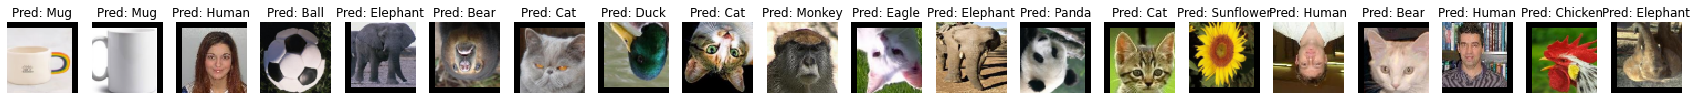

In [36]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(30, 3))
for ax, img_idx, prediction in zip(axes, range(len(X_test)), predicted):
    ax.set_axis_off()
    image = np.array(X_test.iloc[:,:-64].iloc[img_idx:img_idx+1,]).reshape(64,64,3)*255
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}')

In [92]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix

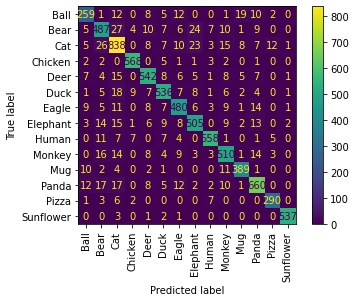

In [106]:
plot_confusion_matrix(model,X_test,y_test, xticks_rotation = 90)